# Part B *Neural Network vs. Perceptron*


 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- ggplot2 - for data visualisation


#### Libraries Used 

In [36]:
library (ggplot2) # for Data Visualisation

#### Task I

Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with
classes are marked with different colors, and attach the plot to your PDF report

In [37]:
####################### GENERAL AUXILIARY FUNCTIONS #######################
## The following structure helps us to have functions with multiple outputs
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

####################### Assignment 3.B #######################
# Read the datasets
set.seed(1234)          # set random seed
list[X1,T1] <- read.data('./Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('./Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 




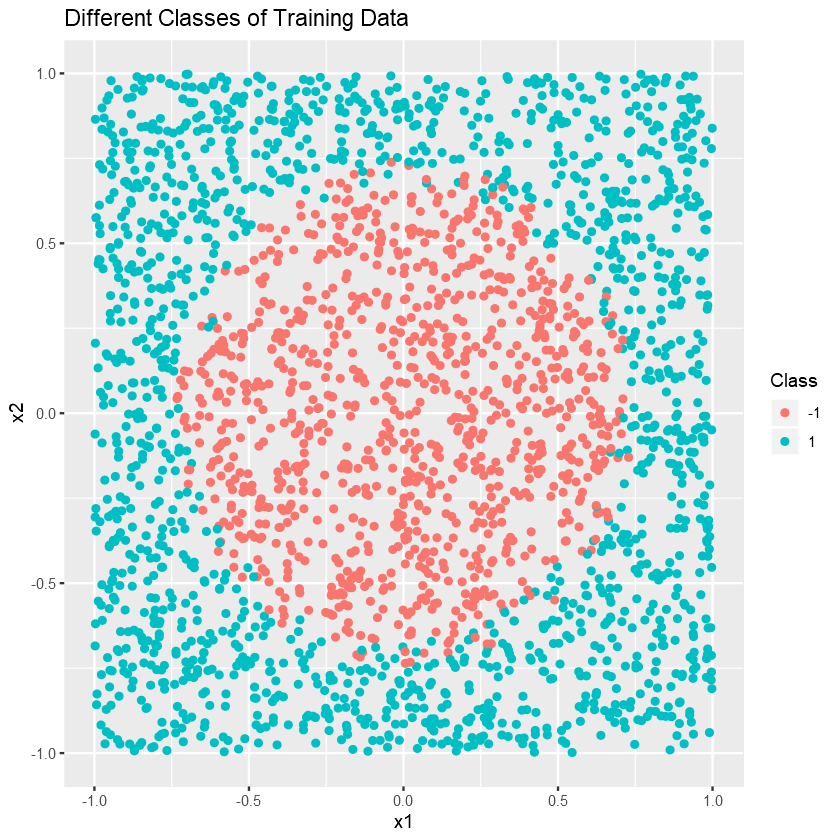

In [38]:
# Plotting the training dataset 

ggplot(X1, aes(x=x1,y=x2,color = as.factor(T1) ))+ggtitle("Different Classes of Training Data") +
labs( color="Class")+
geom_point()


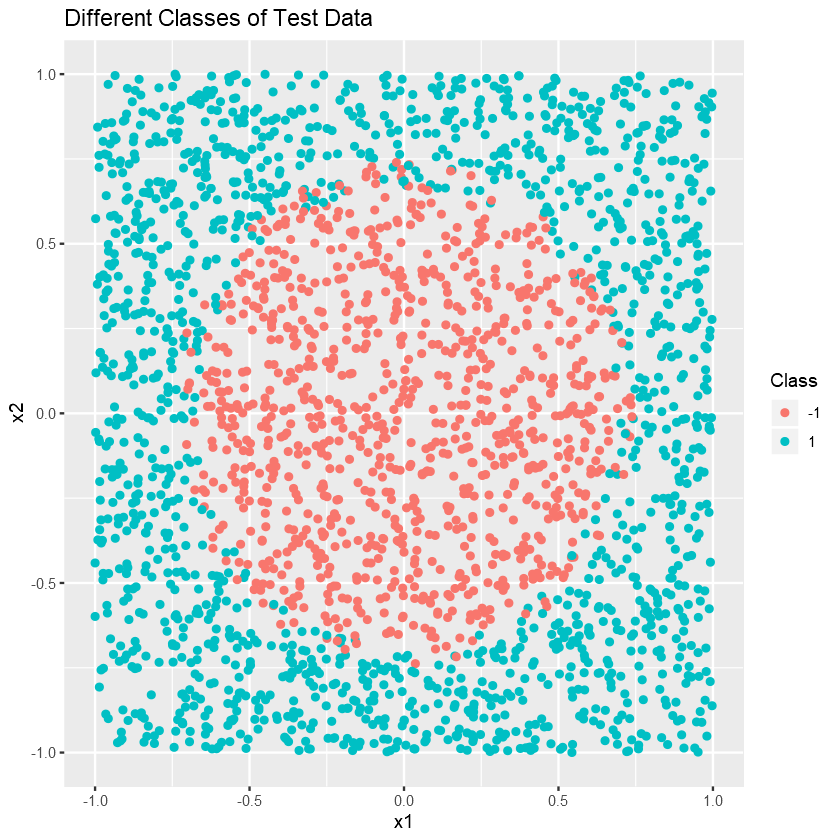

In [39]:
# Plotting the Test dataset 

ggplot(X2, aes(x=x1,y=x2,color = as.factor(T2) ))+ggtitle("Different Classes of Test Data") +
labs( color="Class")+
geom_point()

#### Task II

Run the implementations of Perceptron given to you in Activity 3.1, calculate the test
error, and plot the test data while the points are colored with their estimated class
labels; attach the plot to your PDF report.

Hint. Note that you must remove NA records from the datasets (using
“complete.cases()’ function). You may also choose to change the labels from [0, 1] to
[-1, +1] for your convenience. If you decided to use the code from Activity 3.1, you
may need to change some initial settings (e.g., epsilon and tau.max). Finally,
remember that perceptron is sensitive to initial weights. Therefore, we recommend to
run your code a few times with different initial weights.


##### Perceptron

* Auxillary Functions

In [40]:
#Auxillary Functions
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}


* Perceptron Build function

In [41]:
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron',type ='l')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}


* Building and Predicting of Perceptron

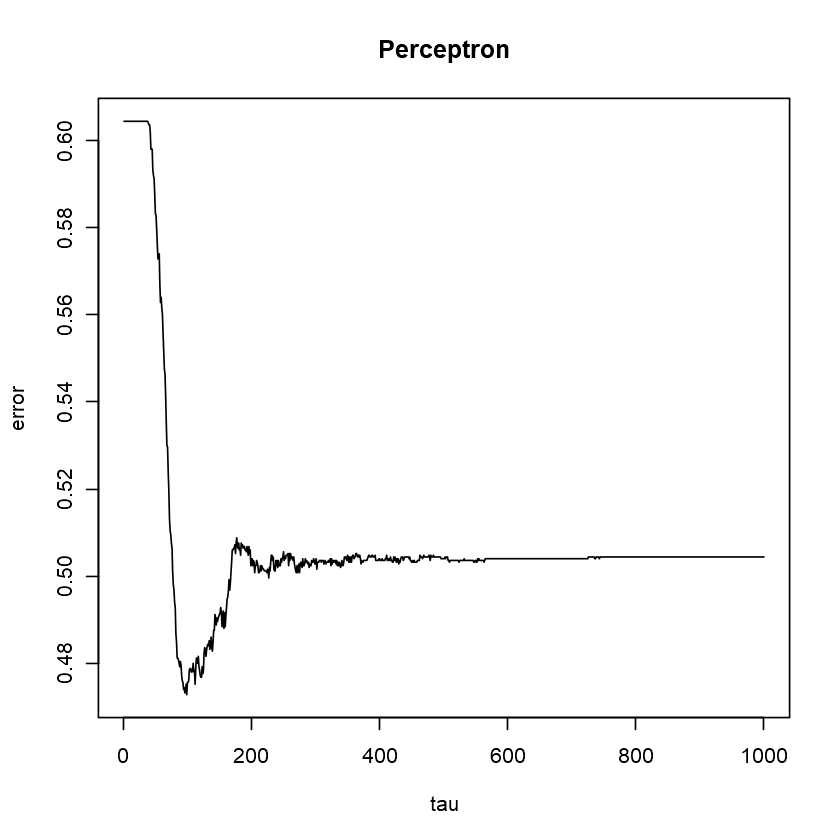

In [42]:
# Build a perceptron and plot its train error curve
W<-perceptron.build(X1, T1, tau.max = 1000, plotting = TRUE) # Run this a few times until you are happy with the result
#? Evaluate Perceptron 
Phi_2 <- as.matrix(cbind(1, X2)) # add a column of 1 as phi_0
Y_pred<- perceptron.predict(Phi_2, W) #Predicting values
Perceptron.error<-error.rate(Y_pred,T2)
## Hint: compute Phi, predict the test labels based on the model from the above statements, and then 

In [43]:
print(paste0("Test Error Observed by Perceptron is ", Perceptron.error*100," %"))

[1] "Test Error Observed by Perceptron is 51.68 %"


* Perceptron Estimate vs Real values

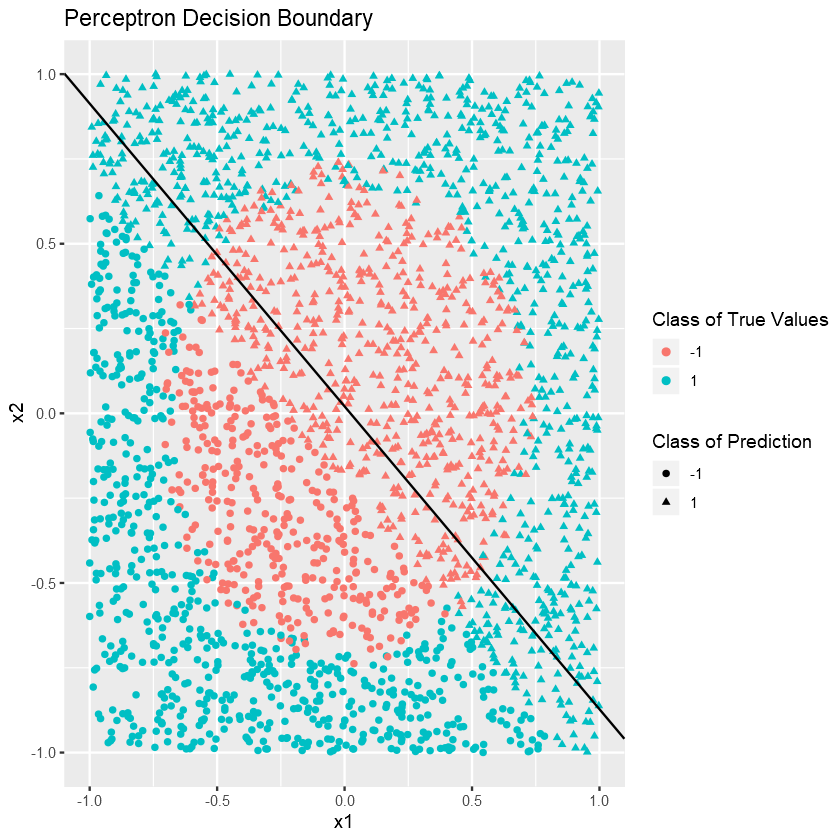

In [44]:
#comparing the predicted labels with the real labels
ggplot(X2,aes(x=x1,y=x2,  shape=as.factor(Y_pred), color=as.factor(T2)))+ geom_point()+
geom_abline(intercept=W[1],slope=-W[2]/W[3])+ labs(shape = "Class of Prediction", color="Class of True Values")+
ggtitle("Perceptron Decision Boundary")

#? Plot Perceptron Decision Boundary (TO BE COMPLETE)
## Hint: Plot the testing data with different symbols for each class (real labels). Then color each point based on its predicted label.


#### Task III

Run the 3-layer Neural Network given to you in Activity 5.1 with different values of K
(i.e, number of units in the hidden layer) and record testing error for each of them;
plot the error vs K and attach it to your PDF report. Based on this plot, find the best K and
the corresponding model, then plot the test data while the points are colored with
their estimated class labels using the best model that you have selected; attach the
plot to your PDF report.

Hint. In case you choose to use the provided examples in Activity 5.1, you may need
to transpose the dataset ()using “t()” function) and use different values for parameter
settings (e.g., lambda). We also recommend to change K to 2, 4, 6, .., 100 (i.e. from
2 to 100 with the step size of 2).

##### Neural Network

* Auxillary Functions

In [45]:
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

* Neural Network

In [46]:
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  if (plotting){plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')}
  return(list(W1, W2, b1, b2))
}

* Running the Neural Network

In [47]:

#? Build a number of Neural Networks with different number of units in the hidden layer (TO BE COMPLETE)
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))
errors<-matrix(NA,nrow=50,ncol=1) # Creating Error Matrix for plotting

for (k in seq(2, 100, 2)) {
    list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=300, eta = 0.1, lambda = 0.01)
    # Evaluating the model 
    Y_pred<-nn.predict(X2.t,W1, W2, b1, b2)
    errors[k/2]=error.rate(Y_pred,T2)
  # Recording the test errors for plotting purposes 
}


* Plotting error for each K

In [49]:
# K with lowest error
min_x =2*which.min(errors)
#Lowest error
min_y=errors[which.min(errors)]
print(paste0("Best K is ", min_x," units, because it has minimum error of ",min_y*100, " %"))

[1] "Best K is 84 units, because it has minimum error of 6.28 %"


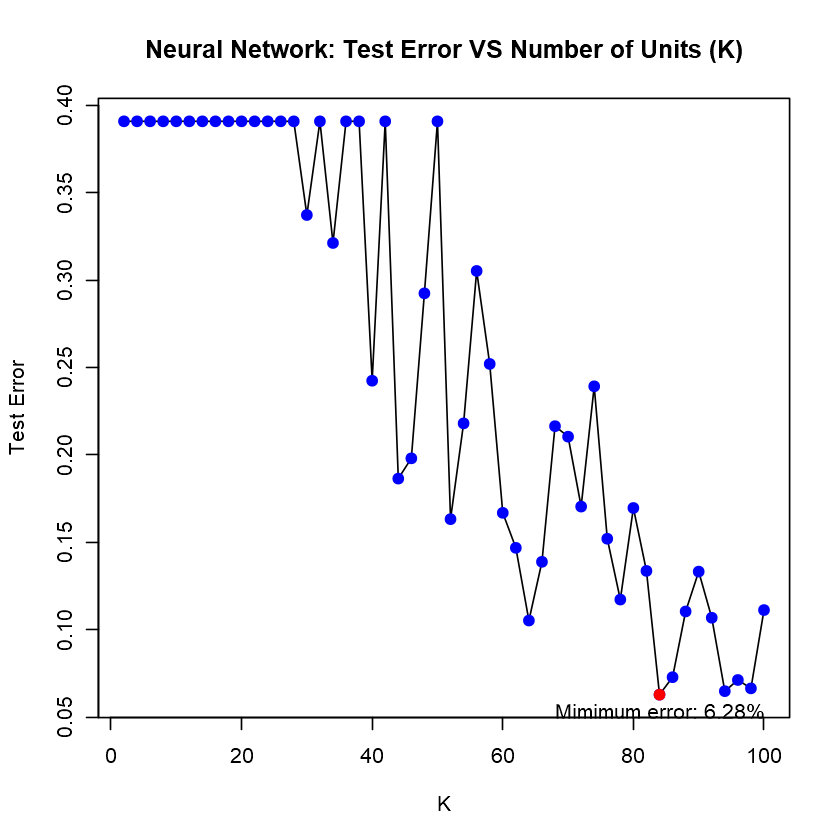

In [50]:
# Plot for the test error versus number of units i.e., k  
plot(x=seq(2,100,2),y=errors, type='l', ylab ='Test Error',xlab ='K',main="Neural Network: Test Error VS Number of Units (K)")
#Reference https://stackoverflow.com/questions/15589601/print-string-and-variable-contents-on-the-same-line-in-r/15589733
points (x=seq(2,100,2),y=errors,col ='blue',pch=19)
points(min_x,min_y,col='red',pch=19)
text (min_x,min_y-.0001, labels=paste0("Mimimum error: ",round(min_y*100,2),"%"),pos=1)


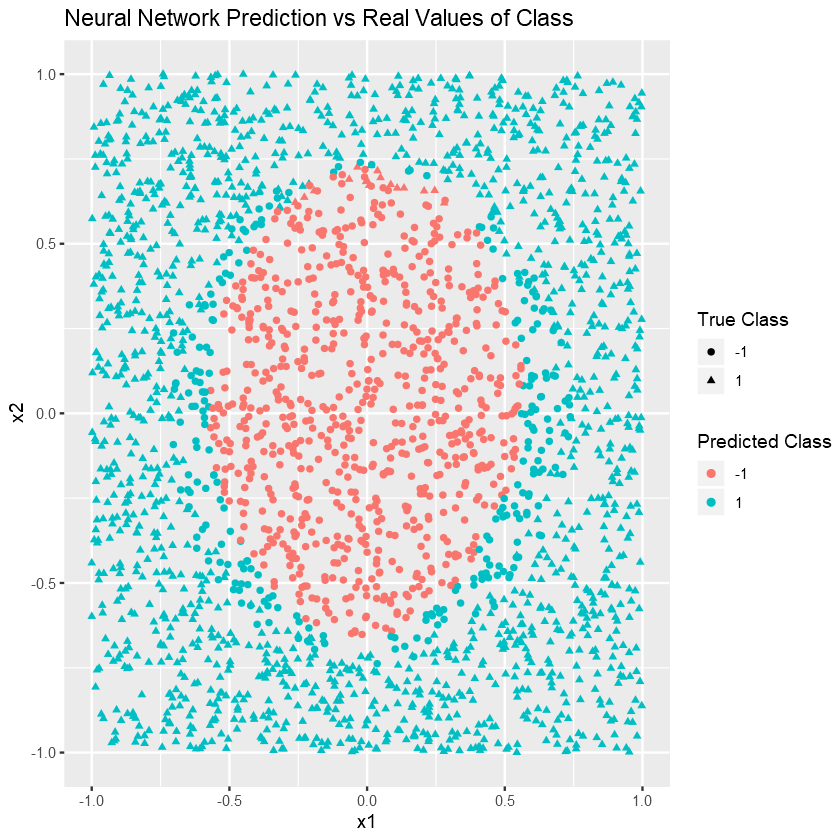

In [51]:
# Plotting the Decision Boundary for NN with the lowest test error 
list[W1, W2, b1, b2]<- nn.build(min_x, X1.t, T1, plotting=FALSE, epoch.max=300, eta = 0.1, lambda = 0.01)
#Reduced the max epoch to reduce the time taken
# Evaluating the model 
Y_min_pred<-nn.predict(X2.t,W1, W2, b1, b2)
#Plotting the testing data with different symbols for each class (real labels). Then color each point based on its predicted label.
ggplot(data =X2, aes(x=x1, y=x2, col=as.factor(Y_min_pred),shape =as.factor(T2)))+
geom_point()+labs(shape="True Class", col ="Predicted Class")+ggtitle("Neural Network Prediction vs Real Values of Class")




##### Task IV
In a table, report the error rates obtained by the perceptron and all variants of NN.
Then bold the best model (with minimum error). Add this table to your PDF report.

In [52]:
#converting error matrix to dataframe
errors.tab <-data.frame(K=seq(2,100,2), 'Error_Percentage'=errors*100)
##Error for different variants of Neural Net
errors.tab

K,Error_Percentage
2,39.08
4,39.08
6,39.08
8,39.08
10,39.08
12,39.08
14,39.08
16,39.08
18,39.08
20,39.08


In [53]:
print(paste0("Error for Perceptron is ", Perceptron.error*100," %"))

[1] "Error for Perceptron is 51.68 %"


In [54]:
print(paste0("In Neural Network, For K = ", min_x," units, error was minimum at ",min_y*100, " %"))


[1] "In Neural Network, For K = 84 units, error was minimum at 6.28 %"


##### Task V
In your PDF report explain the reason(s) responsible for such difference between
perceptron and a 3-layer NN

>-In this task I have explored both Perceptron and Neural Network for binary classification. It is evident from the graphs and errors that Perceptron model didn't performed well. It is primarily because Perceptron work well when data is linearly separable. While on the same data Neural Network performed with very low misclassification error because it is non linear classifier. 